# Etude de cas sur le dataset Communities and Crime des algorithmes de régularisation lasso: ISTA,FISTA et CGDA 

## Présentation du jeu de données

In [31]:
import pandas as pd

df1=pd.read_csv('communities.data')


In [35]:
df1.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [37]:
df1.columns

Index(['8', '?', '?.1', 'Lakewoodcity', '1', '0.19', '0.33', '0.02', '0.9',
       '0.12',
       ...
       '0.12.2', '0.26.1', '0.2.1', '0.06.3', '0.04.2', '0.9.1', '0.5.2',
       '0.32.2', '0.14.3', '0.2.2'],
      dtype='object', length=128)

==> Il y a un probleme avec les noms de colonnes parceque le fichier .data sa premiere ligne n'est pas vrm les nom de colonnes donc il faut les extraire du fichier .names directement 

In [25]:
# Lire le fichier contenant les noms des colonnes
names_file = "communities.names"

# Extraire les vrais noms de colonnes
real_columns = []
with open(names_file, "r") as file:
    for line in file:
        if "@attribute" in line:
            real_columns.append(line.split()[1])  # Prendre le 2eme élément après "@attribute"

print(real_columns)


['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

**==>** On a toutes les colonnes du dataset 

In [27]:
# Charger les données avec les vrais noms de colonnes
df = pd.read_csv("communities.data", header=None, names=real_columns, na_values="?", delimiter=",")

# Vérifier les noms de colonnes
print(df.columns)


Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)


In [40]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [42]:
df.shape

(1994, 128)

==> On a 1994 observations et 128 variables

## Gestion des valeurs manquantes

In [49]:
df.isnull().sum().sort_values(ascending=False).head(n=30)

PolicReqPerOffic        1675
PolicAveOTWorked        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
LemasSwFTFieldPerPop    1675
LemasTotReqPerPop       1675
LemasSwFTFieldOps       1675
LemasSwFTPerPop         1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
LemasSwornFT            1675
PolicBudgPerPop         1675
LemasTotalReq           1675
community               1177
county                  1174
OtherPerCap                1
OwnOccMedVal               0
HousVacant                 0
PctWOFullPlumb             0
PctHousNoPhone             0
MedYrHousBuilt             0
dtype: int64

In [51]:
df.replace("?", pd.NA, inplace=True)  # Convertir les "?" en NaN
df.isnull().sum().sort_values(ascending=False).head(30)


PolicReqPerOffic        1675
PolicAveOTWorked        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
LemasSwFTFieldPerPop    1675
LemasTotReqPerPop       1675
LemasSwFTFieldOps       1675
LemasSwFTPerPop         1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
LemasSwornFT            1675
PolicBudgPerPop         1675
LemasTotalReq           1675
community               1177
county                  1174
OtherPerCap                1
OwnOccMedVal               0
HousVacant                 0
PctWOFullPlumb             0
PctHousNoPhone             0
MedYrHousBuilt             0
dtype: int64

==> Pour avoir toutes les valeurs manquantes meme celles ou on a '?'

In [53]:
# Supprimer colonnes non utiles
df.drop(columns=["state", "county", "community", "communityname", "fold"], inplace=True)  


In [55]:
df.shape

(1994, 123)

In [64]:
# Définir un seuil de 80% de valeurs manquantes et supprimer ces colonnes
seuil = 0.8 * len(df)
df = df.dropna(thresh=seuil, axis=1)

In [66]:
# Remplacer les valeurs manquantes par la médiane des colonnes numériques
df.fillna(df.median(), inplace=True)

In [68]:
print(df.isnull().sum().sum())  # Doit afficher 0 si toutes les valeurs manquantes sont gérées


0


**==>** Il reste 0 valeur manquante 

## Analyse de la variable cible 

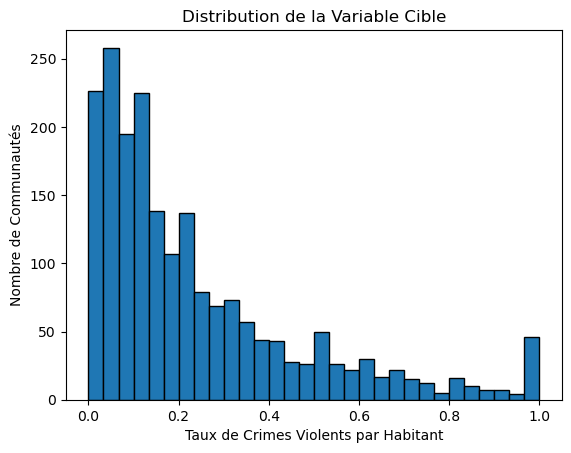

In [70]:
import matplotlib.pyplot as plt

plt.hist(df["ViolentCrimesPerPop"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Taux de Crimes Violents par Habitant")
plt.ylabel("Nombre de Communautés")
plt.title("Distribution de la Variable Cible")
plt.show()


==> On observe une distribution asymétrique à droite, avec une majorité de communautés présentant un faible taux de crimes violents, tandis que quelques communautés affichent des valeurs élevées proches de 1.

## Implémentation de **ISTA**

In [97]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Séparer les variables explicatives et la cible
X = df.drop(columns=["ViolentCrimesPerPop"]).values
y = df["ViolentCrimesPerPop"].values

In [83]:

# Fonction de seuillage (Soft-Thresholding)
def soft_thresholding(x, theta):
    return np.sign(x) * np.maximum(np.abs(x) - theta, 0)


In [85]:
# Algorithme ISTA
def ista(X, y, lambda_, L, num_iterations):
    n, p = X.shape
    beta = np.zeros(p)  # Initialisation des coefficients

    for _ in range(num_iterations):
        gradient = - (1 / n) * X.T @ (y - X @ beta)  # Calcul du gradient
        beta = soft_thresholding(beta - (1 / L) * gradient, lambda_ / L)  # Mise à jour avec seuillage

    return beta


In [87]:
# Fonction pour effectuer la validation croisée
def cross_validate_ista(X, y, lambda_values, num_folds=5, num_iterations=1000):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # 5-fold CV
    results = {}

    for lambda_ in lambda_values:
        fold_errors = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Calcul de la constante L (Lipschitz)
            L = np.linalg.norm(X_train.T @ X_train, ord=2) / len(X_train)
            
            # Entraînement de l'algorithme ISTA
            beta_ista = ista(X_train, y_train, lambda_, L, num_iterations)

            # Prédiction et calcul de l'erreur
            y_pred = X_test @ beta_ista
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            fold_errors.append(rmse)

        # Stocker la moyenne des erreurs RMSE sur les k folds
        results[lambda_] = np.mean(fold_errors)

    return results



### Résultats de RMSE de ISTA 

In [91]:
# Définition des valeurs de lambda à tester
lambda_values = [0.1, 1, 10]

# Application de la validation croisée sur ISTA
results_cv = cross_validate_ista(X, y, lambda_values)

# Affichage des résultats
for lambda_, rmse in results_cv.items():
    print(f"Lambda = {lambda_}, RMSE moyen (validation croisée) = {rmse}")


Lambda = 0.1, RMSE moyen (validation croisée) = 0.2772697665033179
Lambda = 1, RMSE moyen (validation croisée) = 0.3323717668901751
Lambda = 10, RMSE moyen (validation croisée) = 0.3323717668901751


==> On peut conclure que  lambda=0.1 a le meilleur resultat de généralisation et la meilleure capacité à prédire les crimes viloents par habitant.


### Visualisation de la courbe de convergence de ISTA 

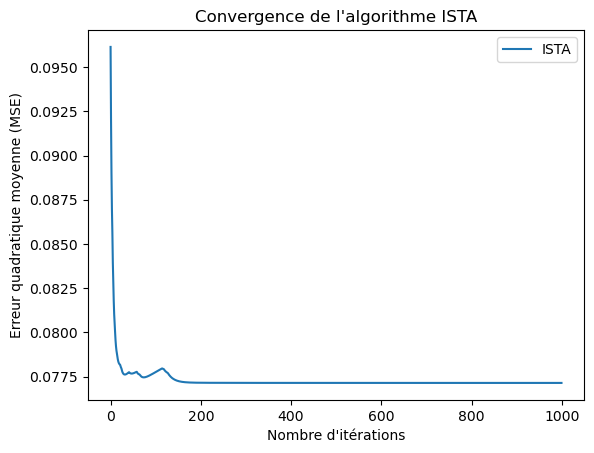

In [93]:

# Exécuter ISTA et stocker les erreurs MSE au fil des itérations
num_iterations = 1000
L = np.linalg.norm(X.T @ X, ord=2) / len(X)

errors = []
beta = np.zeros(X.shape[1])  # Initialisation
lambda_ = 0.1  # Exemple

for _ in range(num_iterations):
    gradient = - (1 / len(X)) * X.T @ (y - X @ beta)
    beta = soft_thresholding(beta - (1 / L) * gradient, lambda_ / L)
    y_pred = X @ beta
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)

# Affichage de la courbe de convergence
plt.plot(range(num_iterations), errors, label="ISTA")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Convergence de l'algorithme ISTA")
plt.legend()
plt.show()


==> l'algorithme converge efficacement et atteint une solution stable après environ 200 itérations

## Implémentation de **FSTA**

In [101]:
# Seuillage doux
def soft_thresholding(x, theta):
    return np.sign(x) * np.maximum(np.abs(x) - theta, 0)

# Algorithme FISTA
def fista(X, y, lambda_, L, num_iterations):
    n, p = X.shape
    beta = np.zeros(p)
    beta_old = np.zeros(p)
    t = 1

    mse_values = []

    for _ in range(num_iterations):
        gradient = - (1 / n) * X.T @ (y - X @ beta)
        beta_new = soft_thresholding(beta - (1 / L) * gradient, lambda_ / L)
        
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        beta = beta_new + ((t - 1) / t_new) * (beta_new - beta_old)

        t = t_new
        beta_old = beta_new

        mse_values.append(mean_squared_error(y, X @ beta))

    return beta, mse_values

In [103]:
# Validation croisée pour FISTA
def cross_validation_fista(X, y, lambda_values, num_folds=5, num_iterations=1000):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    L = np.linalg.norm(X.T @ X, 2) / X.shape[0]  # Plus grande valeur propre de X^TX / n
    
    best_lambda = None
    best_rmse = float('inf')
    rmse_results = {}

    for lambda_ in lambda_values:
        rmse_list = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            beta, _ = fista(X_train, y_train, lambda_, L, num_iterations)
            y_pred = X_test @ beta
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_list.append(rmse)
        
        avg_rmse = np.mean(rmse_list)
        rmse_results[lambda_] = avg_rmse

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_lambda = lambda_

    return rmse_results, best_lambda

### Résultats de RMSE de FSTA 

In [105]:
# Lancer la validation croisée pour FISTA
lambda_values = [0.1, 1, 10]
rmse_results_fista, best_lambda_fista = cross_validation_fista(X, y, lambda_values)

# Afficher les résultats
for lambda_, rmse in rmse_results_fista.items():
    print(f"Lambda = {lambda_}, RMSE moyen (validation croisée) = {rmse}")



Lambda = 0.1, RMSE moyen (validation croisée) = 0.2772697559305679
Lambda = 1, RMSE moyen (validation croisée) = 0.3323717668901751
Lambda = 10, RMSE moyen (validation croisée) = 0.3323717668901751


**==>** Pour FISTA aussi on peut conclure que  lambda=0.1 a le meilleur resultat de généralisation et la meilleure capacité à prédire les crimes viloents par habitant.


### Visualisation de la courbe de convergence de FISTA 

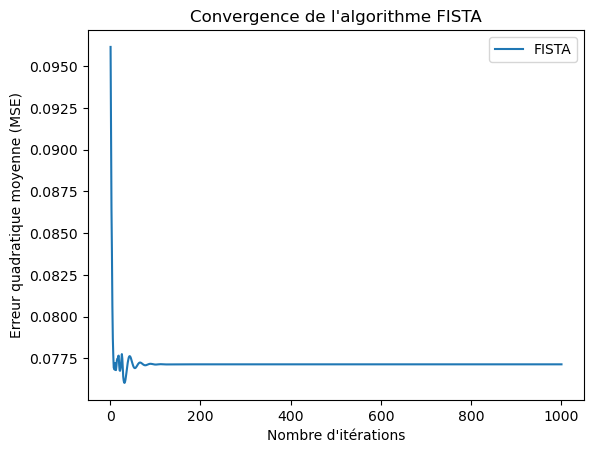

In [127]:
# Afficher la convergence de FISTA pour la meilleure valeur de lambda
best_beta_fista, mse_values_fista = fista(X, y, best_lambda_fista, np.linalg.norm(X.T @ X, 2) / X.shape[0], num_iterations=1000)
plt.plot(range(1, len(mse_values_fista) + 1), mse_values_fista, label="FISTA")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Convergence de l'algorithme FISTA")
plt.legend()
plt.show()

**==>** On remarque une convergence rapide pour FISTA en qq dizaines d'itérations, il atteint plus rapidement que ISTA une stabilité apres une phase de fluctuations.

## Implémentation de **CGDA**

In [138]:
# Fonction de seuillage (soft-thresholding)
def soft_thresholding(x, theta):
    return np.sign(x) * np.maximum(np.abs(x) - theta, 0)

# Implémentation de CGDA avec suivi de la convergence
def cgda(X, y, lambda_, num_iterations):
    n, p = X.shape
    beta = np.zeros(p)  

    XTX = X.T @ X
    XTy = X.T @ y
    mse_values = []  # Stockage des valeurs de MSE

    for _ in range(num_iterations):
        for j in range(p):
            # Mise à jour de la coordonnée j
            residual = XTy[j] - np.sum(XTX[j, :] * beta) + XTX[j, j] * beta[j]
            beta[j] = soft_thresholding(residual, n * lambda_) / XTX[j, j]

        # Calcul de l'erreur quadratique moyenne (MSE)
        y_pred = X @ beta
        mse = mean_squared_error(y, y_pred)
        mse_values.append(mse)  # Stockage des erreurs

    return beta, mse_values  # Retourne beta + les valeurs de convergence MSE

    

In [141]:
# Fonction d'évaluation avec validation croisée
def evaluate_cgda(X, y, lambda_values, num_iterations, num_folds=5):
    
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    results = {}
    mse_convergence = {}

    for lambda_ in lambda_values:
        mse_list = []
        mse_convergence[lambda_] = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            beta = np.zeros(X.shape[1])
            mse_per_iteration = []

            for _ in range(num_iterations):
                for j in range(X.shape[1]):
                    residual = X_train[:, j].T @ y_train - np.sum(X_train[:, j] @ X_train @ beta) + X_train[:, j].T @ X_train[:, j] * beta[j]
                    beta[j] = soft_thresholding(residual, len(y_train) * lambda_) / (X_train[:, j].T @ X_train[:, j])

                y_pred = X_test @ beta
                mse_per_iteration.append(mean_squared_error(y_test, y_pred))
            
            mse_convergence[lambda_].append(mse_per_iteration)
            mse_list.append(mean_squared_error(y_test, X_test @ beta))

        results[lambda_] = np.mean(mse_list)

    return results, mse_convergence

### Résultats de RMSE de CGDA

In [143]:
# Définition des paramètres
lambda_values = [0.1, 1, 10]
num_iterations = 1000

# Évaluation de CGDA
rmse_results_cgda, mse_convergence_cgda = evaluate_cgda(X, y, lambda_values, num_iterations)

# Affichage des résultats
for lambda_, rmse in rmse_results_cgda.items():
    print(f"Lambda = {lambda_}, RMSE moyen (validation croisée) = {rmse:.6f}")

Lambda = 0.1, RMSE moyen (validation croisée) = 0.077327
Lambda = 1, RMSE moyen (validation croisée) = 0.110890
Lambda = 10, RMSE moyen (validation croisée) = 0.110890


**==>** lambda=0.1 donne la meilleure généralisation sur les données de test

### Visualisation de la courbe de convergence de CGDA


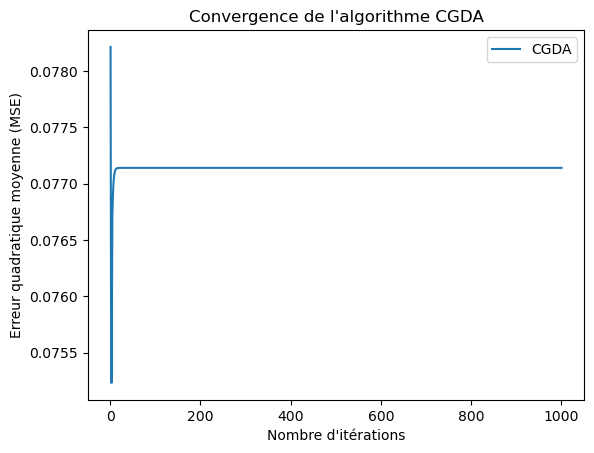

In [145]:
# Trouver la meilleure valeur de lambda pour CGDA
best_lambda_cgda = min(rmse_results_cgda, key=rmse_results_cgda.get)

# Exécuter CGDA pour la meilleure valeur de lambda
best_beta_cgda, mse_values_cgda = cgda(X, y, best_lambda_cgda, num_iterations=1000)

# Tracer la convergence de CGDA
plt.plot(range(1, len(mse_values_cgda) + 1), mse_values_cgda, label="CGDA")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Convergence de l'algorithme CGDA")
plt.legend()
plt.show()




**==>** La courbe de convergence de CGDA montre une décroissance rapide du MSE dès les premières itérations, puis une stabilisation quasi immédiate autour d’une valeur constante